In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_decision_boundary(model, X, y, y_predicted=None, filled=False):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 500)
    vticks = np.linspace(bmin, bmax, 500)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    y_pred_enc = model.predict(ab)

    y_pred_enc = np.round(y_pred_enc)
    y_pred=np.array([np.argmax(y, axis=None, out=None) for y in y_pred_enc])
    Z = y_pred.reshape(aa.shape)

    fig = plt.figure(figsize=(8, 6))
    ax1 = fig.add_subplot(1, 1, 1)
    # plot the contour
    if filled:
        cntr1 = ax1.contourf(aa, bb, Z, shaded=True, cmap='Pastel1', alpha=0.2, linestyles='-.')

    else:
        cntr1 = ax1.contour(aa, bb, Z, colors='darkgrey', alpha=0.8, linestyles='-.')
#   ax1.clabel(cntr1, inline=True, fontsize=10, use_clabeltext=True, colors='b')
    
    if y_predicted is not None:
#        ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='Dark2', ec='darkgrey', marker='H', s=80, alpha=0.8)
#        ax1.scatter(X[:, 0], X[:, 1], c=y_predicted, cmap='Dark2', ec='darkgrey', marker='d', s=50)
        
        sns.scatterplot(x=X[:, 0], y=X[:, 1], palette='Dark2', hue=y, style=y, c=y, alpha=0.7, legend=True, ax=ax1)
        sns.scatterplot(x=X[:, 0], y=X[:, 1], palette='Dark2', hue=y_predicted, style=y_predicted, c=y_predicted, alpha=0.7, legend=False, ax=ax1)
    else:
#        ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='Dark2', ec='darkgrey', marker='H', s=80)
        sns.scatterplot(x=X[:, 0], y=X[:, 1], palette='Dark2', hue=y, style=y, c=y, alpha=1, legend=True, ax=ax1)
    return plt

In [10]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools





from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

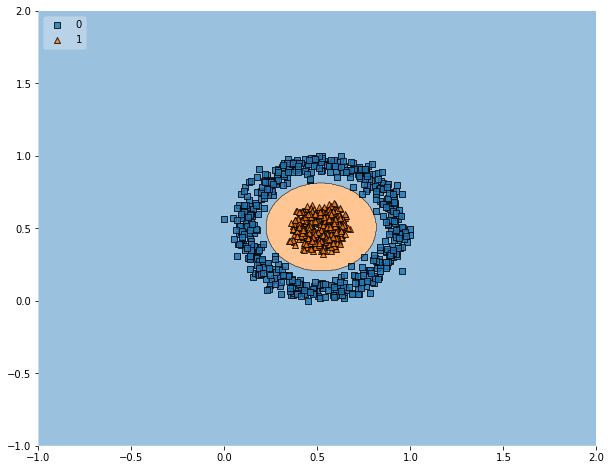

In [42]:
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        y_pred = np.array([np.argmax(y, axis=None, out=None) for y in y_pred])
        return y_pred
    
from sklearn.datasets import make_circles


X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(X)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
clf4.fit(X, y)
plot_decision_regions(X=X, y=y, clf=clf4, legend=2, ax=ax)
plt.show()


<ipython-input-15-04200c44e9b0>:27: UserWarning: No contour levels were found within the data range.
  cntr1 = ax1.contour(aa, bb, Z, colors='darkgrey', alpha=0.8, linestyles='-.')


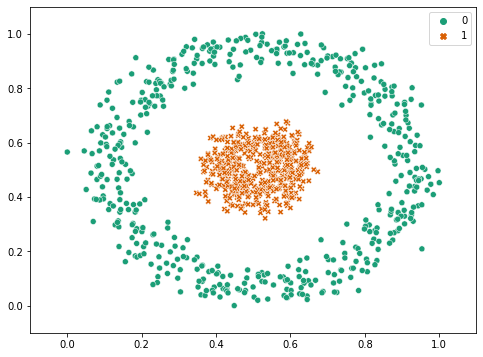

In [29]:
plot_decision_boundary(clf4, X, y, filled=False).show()

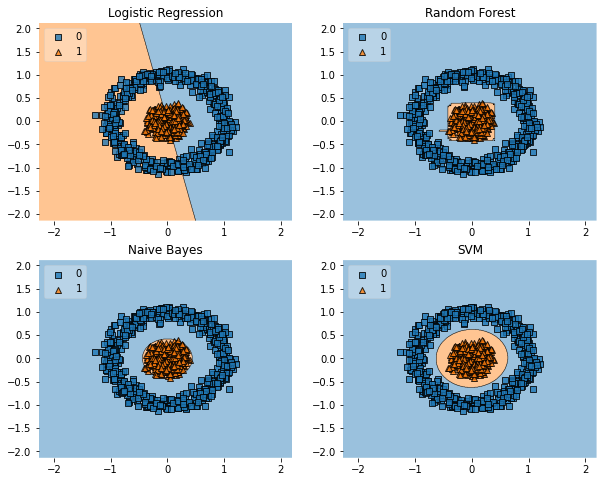

In [11]:


from sklearn.datasets import make_circles


X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()